In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobile_dataset=pd.read_csv('./train.csv')

In [3]:
mobile_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# The dataset does not contain missing values!

In [5]:
import itertools

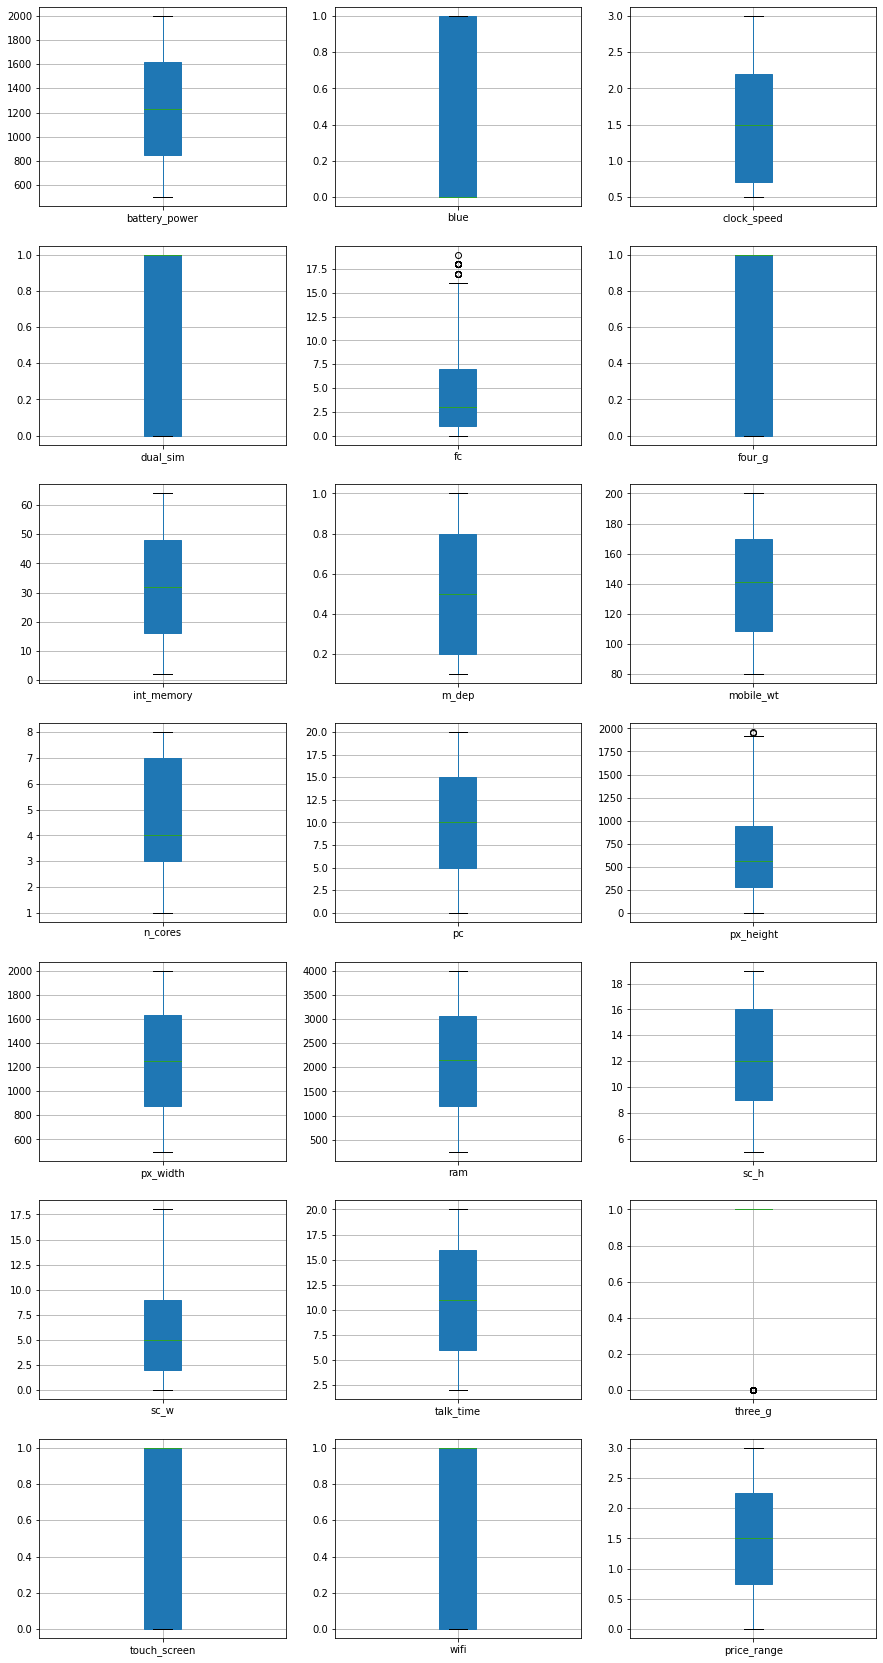

In [6]:
# box plot of each column for visualize outliers in IQR method
boxplot_fig,ax=plt.subplots(nrows=7, ncols=3,figsize=(15,30))
for i in zip(itertools.product(range(7),range(3)),mobile_dataset):
    mobile_dataset.boxplot(column=[i[1]],patch_artist=True,ax=ax[i[0]])
plt.show()

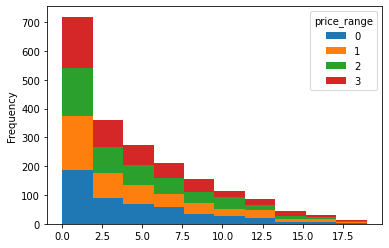

In [7]:
# visualize a histogram based on 'fc' and colored by 'price_range'
mobile_dataset.pivot(columns='price_range',values='fc').plot.hist(stacked=True)
plt.show()

In [8]:
# remove outliers from 'fc' and 'px_height'
for column in ['fc','px_height']:
    Q1=mobile_dataset[column].quantile(0.25)
    Q3=mobile_dataset[column].quantile(0.75)
    IQR=Q3-Q1
    index=mobile_dataset.loc[(mobile_dataset[column]<Q1-1.5*IQR)|(mobile_dataset[column]>Q3+1.5*IQR)].index
    mobile_dataset.drop(index=index,inplace=True)

In [9]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1980 non-null   int64  
 1   blue           1980 non-null   int64  
 2   clock_speed    1980 non-null   float64
 3   dual_sim       1980 non-null   int64  
 4   fc             1980 non-null   int64  
 5   four_g         1980 non-null   int64  
 6   int_memory     1980 non-null   int64  
 7   m_dep          1980 non-null   float64
 8   mobile_wt      1980 non-null   int64  
 9   n_cores        1980 non-null   int64  
 10  pc             1980 non-null   int64  
 11  px_height      1980 non-null   int64  
 12  px_width       1980 non-null   int64  
 13  ram            1980 non-null   int64  
 14  sc_h           1980 non-null   int64  
 15  sc_w           1980 non-null   int64  
 16  talk_time      1980 non-null   int64  
 17  three_g        1980 non-null   int64  
 18  touch_sc

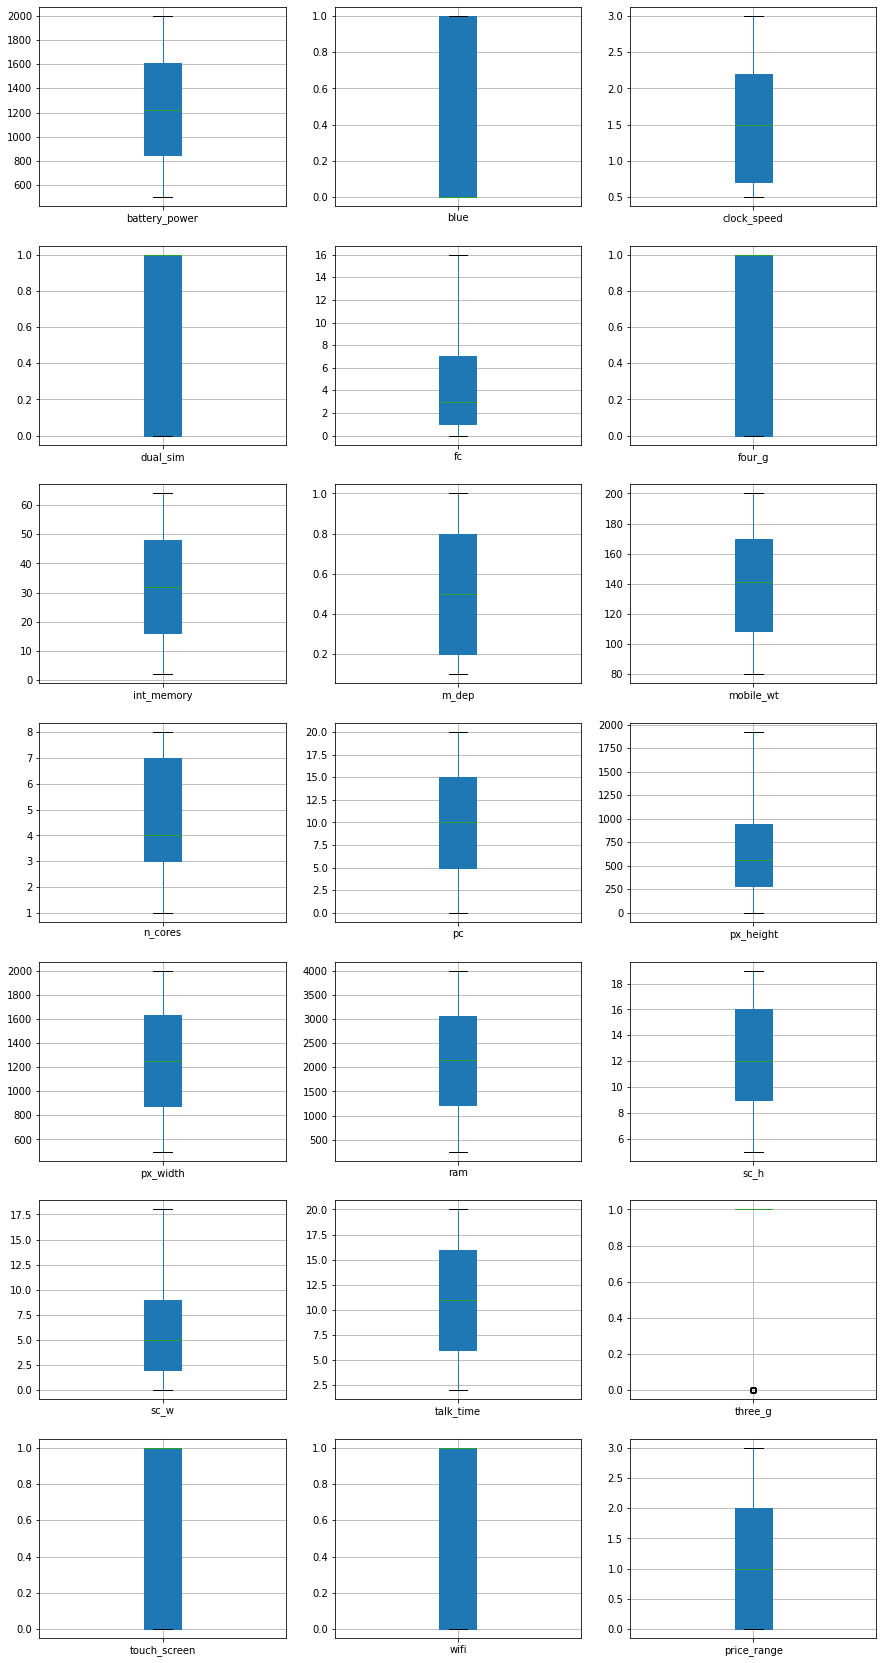

In [10]:
# box plot of each column for visualize outliers 
boxplot_fig,ax=plt.subplots(nrows=7, ncols=3,figsize=(15,30))
for i in zip(itertools.product(range(7),range(3)),mobile_dataset):
    mobile_dataset.boxplot(column=[i[1]],patch_artist=True,ax=ax[i[0]])
plt.show()

# all of outliers deleted from dataset...

In [11]:
pd.set_option('display.max_columns',None)
mobile_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,1236.402020,0.494444,1.521162,0.509091,4.189899,0.520707,32.055051,0.502222,140.168182,4.527273,9.836364,641.183838,1249.646465,2125.135859,12.316667,5.773737,11.003535,0.760606,0.501515,0.505051,1.497980
std,439.568762,0.500095,0.817236,0.500044,4.168422,0.499697,18.126820,0.288722,35.385004,2.291263,6.023408,439.957961,431.606730,1084.556984,4.209307,4.358066,5.458048,0.426821,0.500124,0.500101,1.117863
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,849.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,281.750000,874.000000,1209.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1224.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,561.500000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1614.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,942.000000,1629.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,16.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1920.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


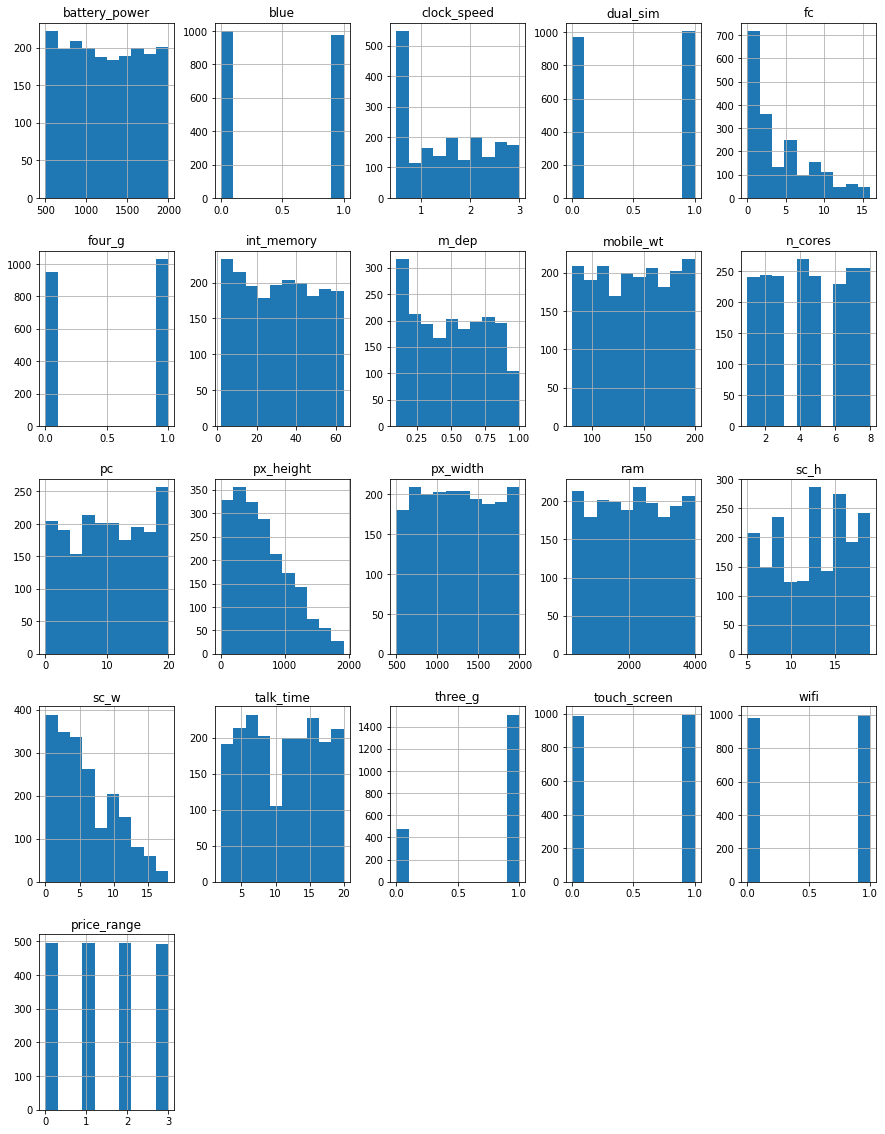

In [12]:
%matplotlib inline
mobile_dataset.hist(figsize=(15,20))
plt.show()

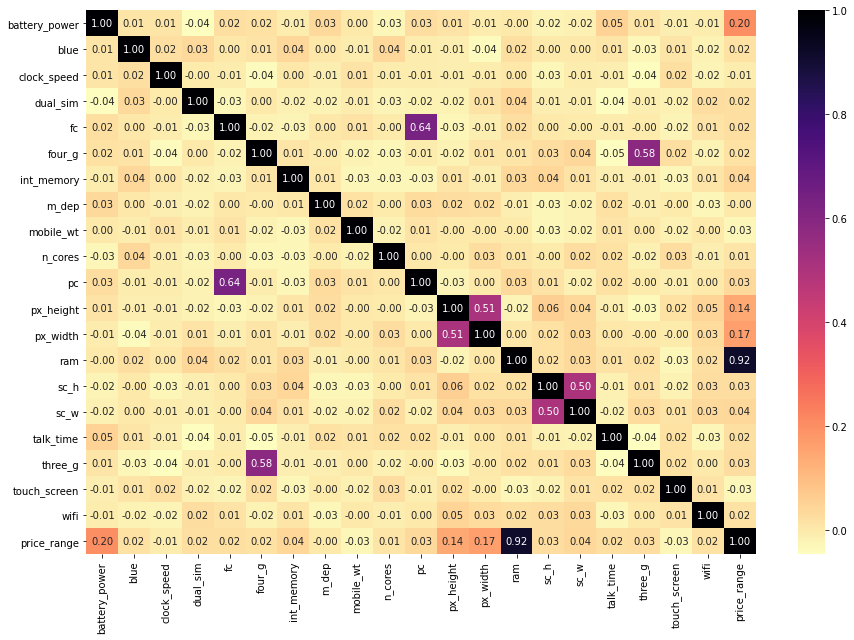

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(mobile_dataset.corr(), annot=True, fmt='.2f',cmap=plt.cm.magma_r)
plt.show()

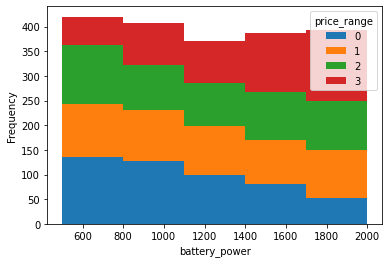

In [14]:
# visualize a histogram based on 'battery_power' and colored by 'price_range'
mobile_dataset.pivot(columns='price_range',values='battery_power').plot.hist(stacked=True,bins=5)
plt.xlabel('battery_power')
plt.show()

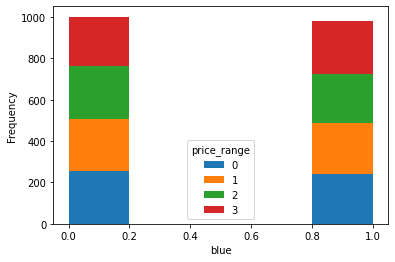

In [15]:
# visualize a histogram based on 'blue' and colored by 'price_range'
mobile_dataset.pivot(columns='price_range',values='blue').plot.hist(stacked=True,bins=5)
plt.xlabel('blue')
plt.show()

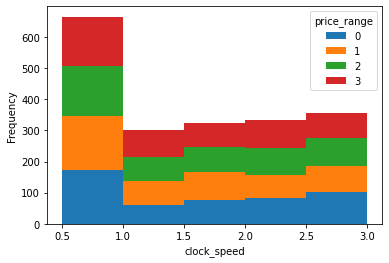

In [16]:
# visualize a histogram based on 'blue' and colored by 'price_range'
mobile_dataset.pivot(columns='price_range',values='clock_speed').plot.hist(stacked=True,bins=5)
plt.xlabel('clock_speed')
plt.show()

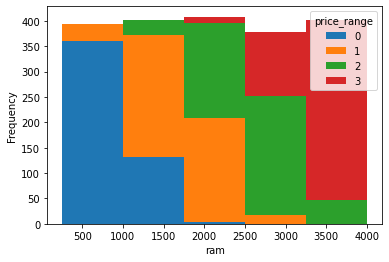

In [17]:
# visualize a histogram based on 'ram' and colored by 'price_range'
mobile_dataset.pivot(columns='price_range',values='ram').plot.hist(stacked=True,bins=5)
plt.xlabel('ram')
plt.show()

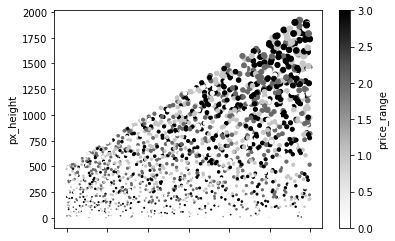

In [18]:
mobile_dataset.plot.scatter(x='px_width',y='px_height',c='price_range',s=(mobile_dataset.px_height*mobile_dataset.px_width)/100000)
plt.xlabel('px_width')
plt.show()

In [19]:
mobile_dataset['px_area']=(mobile_dataset.px_height*mobile_dataset.px_width)

In [20]:
# checking the correlations for features
mobile_dataset.corr()['price_range'][['px_height','px_width','px_area']]

px_height    0.144277
px_width     0.165132
px_area      0.172349
Name: price_range, dtype: float64

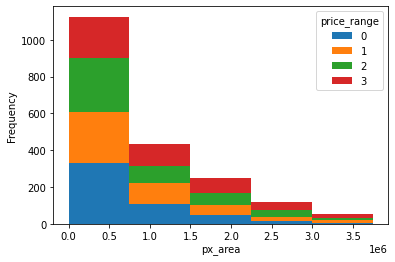

In [21]:
# visualize a histogram based on 'px_area' and colored by 'price_range'
mobile_dataset.pivot(columns='price_range',values='px_area').plot.hist(stacked=True,bins=5)
plt.xlabel('px_area')
plt.show()

In [22]:
# create new feature 'area' with product of 'sc_h' and 'sc_w'
mobile_dataset['area']=(mobile_dataset.sc_h*mobile_dataset.sc_w)

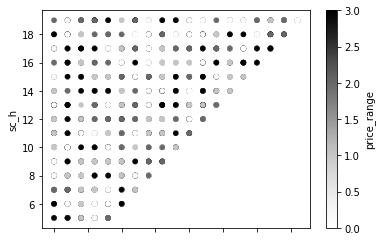

In [23]:
mobile_dataset.plot.scatter(x='sc_w',y='sc_h',c='price_range')
plt.xlabel('sc_w')
plt.show()

In [24]:
mobile_dataset.corr()['price_range'][['sc_h','sc_w','area']]

sc_h    0.025641
sc_w    0.038076
area    0.040990
Name: price_range, dtype: float64

<AxesSubplot:>

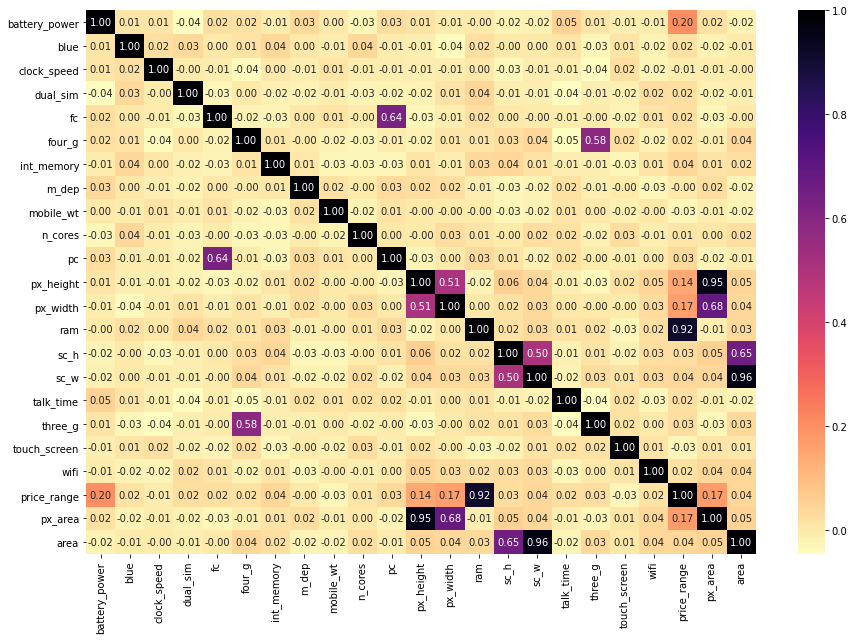

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(mobile_dataset.corr(), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [26]:
mobile_dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,px_area,area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1464096,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,2309580,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,1797975,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,1416576,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,225120,180


# Statistical hypothesis tests

In [27]:
# In the first hypothesis, we examine whether the average quality 
# of the main camera and the front camera are equal or not
# we do this by the Paired Student's t-test
from scipy.stats import ttest_rel
stat, p = ttest_rel(mobile_dataset.pc, mobile_dataset.fc)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('accept null hypothesis')
else:
    print('reject null hypothesis')

stat=53.885, p=0.000
reject null hypothesis


In [28]:
# Investigate whether the two variables of mobile phones being blue 
# and their price range are independent or dependent
# we do this by the Chi-Squared Test
from scipy.stats import chi2_contingency
table =pd.crosstab(mobile_dataset.blue,mobile_dataset.price_range)
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.948, p=0.814
Probably independent


In [29]:
# Check if the battery power has a normal distribution or not
# we do this with the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(mobile_dataset.battery_power)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.952, p=0.000
Probably not Gaussian


In [30]:
# Check if the px_width has an mean=190 or not
from scipy.stats import ttest_1samp
alpha = 0.05 
tstat,p_value = ttest_1samp(mobile_dataset.px_width,popmean = 200)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 108.21499277595966 , p_value : 0.0
reject null hypothesis


In [31]:
# check the distributions of px_width and px_height of the mobile
# Kruskal-Wallis H Test
from scipy.stats import kruskal
stat, p = kruskal(mobile_dataset.px_height, mobile_dataset.px_width)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1315.482, p=0.000
Probably different distributions


# model training

In [32]:
# split dataset with StratifiedShuffleSplit to prevent sampling bias
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
st_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [34]:
for train_index,test_index in st_split.split(mobile_dataset,mobile_dataset.price_range):
    train=mobile_dataset.iloc[train_index]
    test=mobile_dataset.iloc[test_index]

In [35]:
mobile_dataset['price_range'].value_counts()/len(mobile_dataset)

2    0.250505
0    0.250505
1    0.250000
3    0.248990
Name: price_range, dtype: float64

In [36]:
train['price_range'].value_counts()/len(train)

2    0.250631
0    0.250631
1    0.250000
3    0.248737
Name: price_range, dtype: float64

In [37]:
test['price_range'].value_counts()/len(test)

3    0.25
0    0.25
2    0.25
1    0.25
Name: price_range, dtype: float64

<h3>This indicates that the data spliting is done properly</h3>

In [38]:
# we use features with more than 4%  absolute correlation for training models
def best_features(data,target_label,threshold):
    abs_correlatins=abs(data.corr().price_range)
    labels=abs_correlatins[abs_correlatins>threshold].index
    return labels

In [39]:
labels=best_features(train,'price_range',0.04)

In [40]:
labels

Index(['battery_power', 'int_memory', 'pc', 'px_height', 'px_width', 'ram',
       'price_range', 'px_area', 'area'],
      dtype='object')

In [41]:
train=train[labels]
test=test[labels]

In [42]:
train

,battery_power,int_memory,pc,px_height,px_width,ram,price_range,px_area,area
587,1663,40,15,951,1545,1336,1,1469295,40
1241,1221,35,19,765,1899,2638,2,1452735,304
279,823,39,4,630,888,294,0,559440,117
1043,1948,18,14,477,571,816,0,272367,32
730,1049,2,10,39,1564,433,0,60996,70
...,...,...,...,...,...,...,...,...,...
1751,508,50,9,102,1195,2175,1,121890,56
1832,897,17,2,547,1852,2948,2,1013044,36
973,516,30,12,126,698,3731,2,87948,221
1775,574,30,3,94,1334,1167,0,125396,15


In [43]:
test

,battery_power,int_memory,pc,px_height,px_width,ram,price_range,px_area,area
16,838,13,4,984,1850,3554,3,1820400,90
1715,1969,7,20,332,764,315,0,253648,112
557,1519,32,10,168,1239,2912,2,208152,110
823,1593,52,0,761,1336,1354,1,1016696,195
1927,1023,63,8,367,1985,3155,3,728495,110
...,...,...,...,...,...,...,...,...,...
1168,1250,44,20,703,1011,1882,1,710733,14
1069,1414,27,20,804,1564,312,0,1257456,10
524,825,23,0,206,1917,3278,3,394902,48
1744,731,28,0,424,1032,1774,1,437568,96


In [44]:
X=train.drop(columns=['price_range'])
y=train.price_range

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# logistic regression

In [52]:
LR_classifier=LogisticRegression(solver='newton-cg',max_iter=4000)

In [53]:
LR_classifier.fit(X,y)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=4000, solver='newton-cg')

In [54]:
X_test=test.drop(columns=['price_range'])
y_test=test.price_range

In [55]:
from sklearn import metrics

<AxesSubplot:>

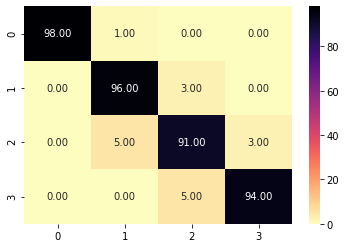

In [56]:
sns.heatmap(metrics.confusion_matrix(y_test,LR_classifier.predict(X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [58]:
print(metrics.classification_report(y_test,LR_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.94      0.97      0.96        99
           2       0.92      0.92      0.92        99
           3       0.97      0.95      0.96        99

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396



# decision tree

In [59]:
DT_classifier=DecisionTreeClassifier(criterion='entropy',min_samples_split=8,min_samples_leaf=5,random_state=42)

In [60]:
DT_classifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=8, random_state=42)

In [61]:
metrics.accuracy_score(y_test,DT_classifier.predict(X_test))

0.8585858585858586

<AxesSubplot:>

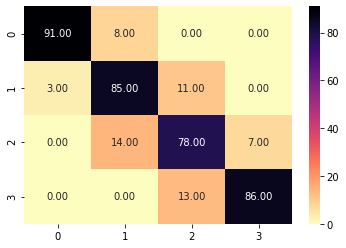

In [62]:
sns.heatmap(metrics.confusion_matrix(y_test,DT_classifier.predict(X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [81]:
print(metrics.classification_report(y_test,DT_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.79      0.86      0.83        99
           2       0.76      0.79      0.78        99
           3       0.92      0.87      0.90        99

    accuracy                           0.86       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.86      0.86      0.86       396



# random forest

In [82]:
RF_classifire= RandomForestClassifier(n_estimators=200,criterion='entropy')
RF_classifire.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [83]:
metrics.accuracy_score(y_test,RF_classifire.predict(X_test))

0.8964646464646465

<AxesSubplot:>

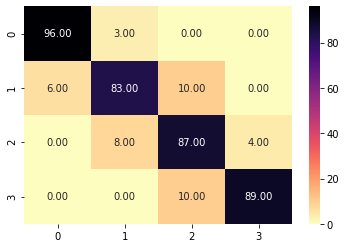

In [85]:
sns.heatmap(metrics.confusion_matrix(y_test,RF_classifire.predict(X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

<AxesSubplot:>

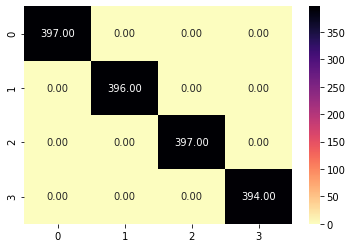

In [86]:
# RF_classifire on train data
sns.heatmap(metrics.confusion_matrix(y,RF_classifire.predict(X)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

<AxesSubplot:>

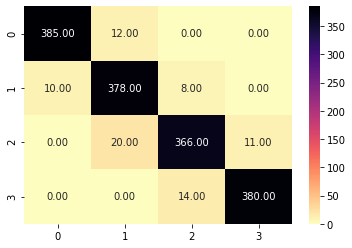

In [87]:
# DT_classifire on train data
sns.heatmap(metrics.confusion_matrix(y,DT_classifier.predict(X)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [91]:
print(metrics.classification_report(y_test,RF_classifire.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.83      0.82      0.82        99
           2       0.77      0.81      0.79        99
           3       0.96      0.88      0.92        99

    accuracy                           0.87       396
   macro avg       0.87      0.87      0.87       396
weighted avg       0.87      0.87      0.87       396



<AxesSubplot:>

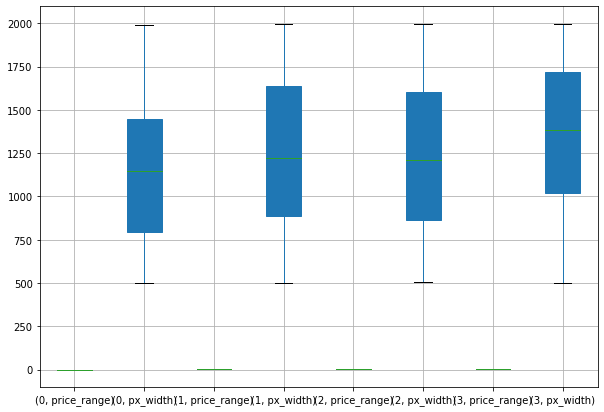

In [88]:
train[['price_range','px_width']].groupby('price_range').boxplot(subplots=False,patch_artist=True,figsize=(10,7))

<AxesSubplot:>

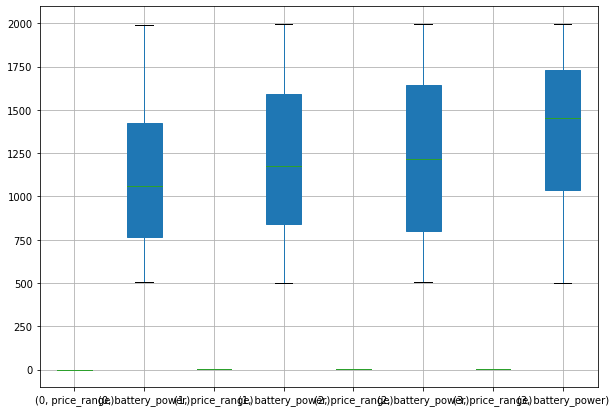

In [90]:
train[['price_range','battery_power']].groupby('price_range').boxplot(subplots=False,patch_artist=True,figsize=(10,7))

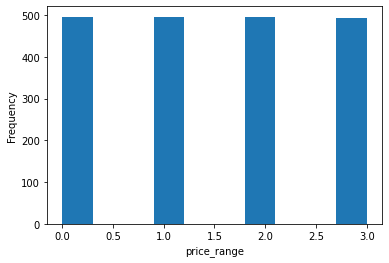

In [92]:
mobile_dataset['price_range'].plot.hist()
plt.xlabel('price_range')
plt.show()

# scaling

In [93]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [97]:
#use min-max scaler
min_max_scaler=MinMaxScaler()
mm_scaled_X=min_max_scaler.fit_transform(X)
mm_scaled_X_test=min_max_scaler.transform(X_test)

In [112]:
#use standar scaler
standard_scaler=StandardScaler()
st_scaled_X=standard_scaler.fit_transform(X)
st_scaled_X_test=standard_scaler.transform(X_test)

In [113]:
LR_classifier_mm=LogisticRegression(solver='newton-cg',max_iter=3000)

In [114]:
LR_classifier_mm.fit(mm_scaled_X,y)

LogisticRegression(max_iter=3000, solver='newton-cg')

<AxesSubplot:>

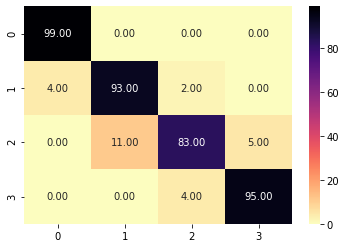

In [116]:
# with min max scaler
sns.heatmap(metrics.confusion_matrix(y_test,LR_classifier_mm.predict(mm_scaled_X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [117]:
print(metrics.classification_report(y_test,LR_classifier_mm.predict(mm_scaled_X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       0.89      0.94      0.92        99
           2       0.93      0.84      0.88        99
           3       0.95      0.96      0.95        99

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396



In [118]:
LR_classifier_st=LogisticRegression(solver='newton-cg',max_iter=3000)
LR_classifier_st.fit(st_scaled_X,y)

LogisticRegression(max_iter=3000, solver='newton-cg')

<AxesSubplot:>

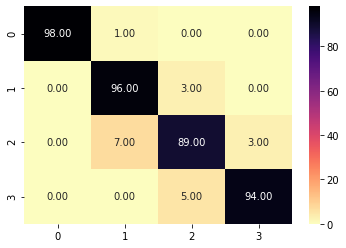

In [119]:
# with standard scaler
sns.heatmap(metrics.confusion_matrix(y_test,LR_classifier_st.predict(st_scaled_X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [120]:
print(metrics.classification_report(y_test,LR_classifier_st.predict(st_scaled_X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.92      0.97      0.95        99
           2       0.92      0.90      0.91        99
           3       0.97      0.95      0.96        99

    accuracy                           0.95       396
   macro avg       0.95      0.95      0.95       396
weighted avg       0.95      0.95      0.95       396



In [125]:
DT_classifier_mm=DecisionTreeClassifier(criterion='entropy',min_samples_split=8,min_samples_leaf=5,random_state=42)

In [126]:
DT_classifier_mm.fit(mm_scaled_X,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=8, random_state=42)

<AxesSubplot:>

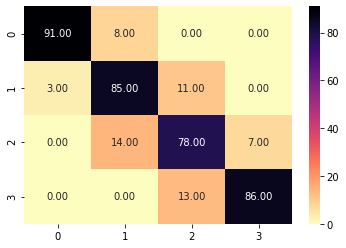

In [127]:
sns.heatmap(metrics.confusion_matrix(y_test,DT_classifier_mm.predict(mm_scaled_X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [130]:
print(metrics.classification_report(y_test,DT_classifier_mm.predict(mm_scaled_X_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.79      0.86      0.83        99
           2       0.76      0.79      0.78        99
           3       0.92      0.87      0.90        99

    accuracy                           0.86       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.86      0.86      0.86       396



In [131]:
DT_classifier_st=DecisionTreeClassifier(criterion='entropy',min_samples_split=8,min_samples_leaf=5,random_state=42)

In [132]:
DT_classifier_st.fit(st_scaled_X,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=8, random_state=42)

<AxesSubplot:>

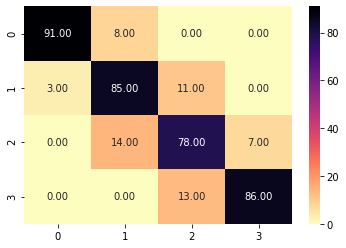

In [133]:
# with standard scaler
sns.heatmap(metrics.confusion_matrix(y_test,DT_classifier_st.predict(st_scaled_X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [134]:
print(metrics.classification_report(y_test,DT_classifier_st.predict(st_scaled_X_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.79      0.86      0.83        99
           2       0.76      0.79      0.78        99
           3       0.92      0.87      0.90        99

    accuracy                           0.86       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.86      0.86      0.86       396



In [135]:
from sklearn.decomposition import PCA

In [242]:
def component_numbers(pov,data):
    pca=PCA(n_components=data.shape[1])
    transformed=pca.fit(data)
    variances=pca.explained_variance_
    for i in range(data.shape[1]):
        if np.sum(variances[:i+1])/variances.sum()>=pov:
            return i+1

In [262]:
n_components=component_numbers(0.99,X)

In [263]:
n_components

1

<h3>As you can see, for pov equal to 0.99, it produces only one component,<br/> so for smaller povs, the result will be the same, so it is not necessary to examine them separately.</h3>


In [282]:
pca=PCA(n_components=0.99,svd_solver='full')

In [283]:
x_pca=pca.fit_transform(X)

In [284]:
x_pca.shape

(1584, 1)

In [285]:
X

,battery_power,int_memory,pc,px_height,px_width,ram,px_area,area
587,1663,40,15,951,1545,1336,1469295,40
1241,1221,35,19,765,1899,2638,1452735,304
279,823,39,4,630,888,294,559440,117
1043,1948,18,14,477,571,816,272367,32
730,1049,2,10,39,1564,433,60996,70
...,...,...,...,...,...,...,...,...
1751,508,50,9,102,1195,2175,121890,56
1832,897,17,2,547,1852,2948,1013044,36
973,516,30,12,126,698,3731,87948,221
1775,574,30,3,94,1334,1167,125396,15


In [286]:
x_pca

array([[ 577887.35253996],
       [ 561327.33973343],
       [-331967.839302  ],
       ...,
       [-803460.19079231],
       [-766011.90314623],
       [-404045.67038867]])

In [287]:
LR_classifier=LogisticRegression(solver='newton-cg',max_iter=4000)

In [288]:
LR_classifier.fit(x_pca,y)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=4000, solver='newton-cg')

In [289]:
metrics.accuracy_score(y_test,LR_classifier.predict(pca.transform(X_test)))

0.3409090909090909

<AxesSubplot:>

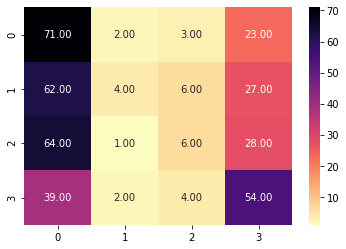

In [290]:
sns.heatmap(metrics.confusion_matrix(y_test,LR_classifier.predict(pca.transform(X_test))), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [297]:
pca=PCA(n_components=0.9999999,svd_solver='full')

In [298]:
x_pca=pca.fit_transform(X)

In [299]:
x_pca.shape

(1584, 4)

In [300]:
LR_classifier=LogisticRegression(solver='newton-cg',max_iter=4000)

In [301]:
LR_classifier.fit(x_pca,y)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=4000, solver='newton-cg')

In [302]:
metrics.accuracy_score(y_test,LR_classifier.predict(pca.transform(X_test)))

0.9419191919191919

<AxesSubplot:>

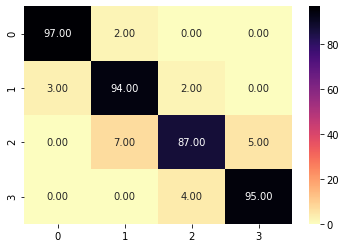

In [303]:
sns.heatmap(metrics.confusion_matrix(y_test,LR_classifier.predict(pca.transform(X_test))), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# change labels

In [307]:
dc={
    0:0,
    1:5,
    2:5,
    3:5
}

In [310]:
y_new=y.apply(lambda x:dc[x])
y_test_new=y_test.apply(lambda x:dc[x])

In [311]:
LR_classifier.fit(X,y_new)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\lo

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\lo

LogisticRegression(max_iter=4000, solver='newton-cg')

In [315]:
metrics.accuracy_score(y_test_new,LR_classifier.predict(X_test))

0.9974747474747475

<AxesSubplot:>

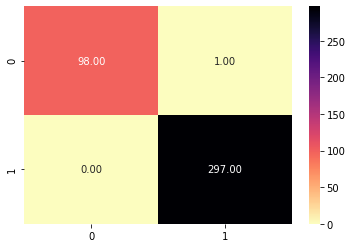

In [316]:
sns.heatmap(metrics.confusion_matrix(y_test_new,LR_classifier.predict(X_test)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# using oversampeling to Combat Imbalanced dataset

In [319]:
from imblearn.over_sampling import RandomOverSampler

In [320]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [327]:
X_over,y_over=oversample.fit_resample(X,y_new)
X_test_over,y_test_over=oversample.fit_resample(X_test,y_test_new)

In [328]:
y_over.value_counts()

5    1187
0    1187
Name: price_range, dtype: int64

In [329]:
y_test_over.value_counts()

5    297
0    297
Name: price_range, dtype: int64

In [330]:
LR_classifier.fit(X_over,y_over)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\lo

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\erfansky\appdata\lo

LogisticRegression(max_iter=4000, solver='newton-cg')

In [331]:
metrics.accuracy_score(y_test_over,LR_classifier.predict(X_test_over))

0.9915824915824916

<AxesSubplot:>

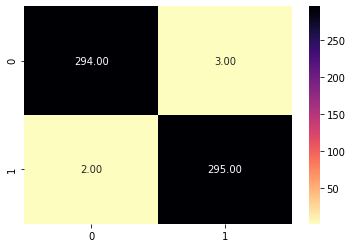

In [332]:
sns.heatmap(metrics.confusion_matrix(y_test_over,LR_classifier.predict(X_test_over)), annot=True, fmt='.2f',cmap=plt.cm.magma_r)